<a href="https://colab.research.google.com/github/mmedhat2/Projects/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gathering Data**

In [577]:
import pandas as pd 
import numpy as np
import tweepy
import requests
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns



archivedf = pd.read_csv('twitter-archive-enhanced.csv')


In [578]:
archivedf

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [580]:
imgdf = pd.DataFrame(columns=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
                              'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# Download the TSV file
response = requests.get(url)
response.raise_for_status()  # Raise an exception if the download fails




with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)
# Save the file to disk
with open("image-predictions.tsv", "r", encoding="utf-8") as file:
    # Create a CSV reader object
    reader = csv.reader(file, delimiter="\t")

    # Iterate over the rows and print the data
    for row in reader:
      imgdf.loc[len(imgdf)] = row
        

imgdf = imgdf.tail(-1)
imgdf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
2,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
3,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
4,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
5,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2071,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
2072,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False
2073,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
2074,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True


In [581]:
import json
text_file_path = 'tweets.txt'
data = []
with open(text_file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            data.append(json.loads(line))
            
tweetsdf = pd.DataFrame(data)


In [582]:
tweetsdf

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


# **Assesing Data**

## Tidiness issues

Issue (1): Wrong Data Types

In [583]:
#Data Types


print(archivedf.info())
print(imgdf.info())
print(tweetsdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Issue (2) : Columns have mutiple values that can't be used

In [584]:
tweetsdf.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

Issue (3) : unnecessary columns  that can be joined

In [585]:
archivedf.iloc[:,-4:]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


## Quality issues

Issue ( 1 ): Missing Values in Archive Dataset


Issue ( 2 ): Missing Values in Tweets Dataset

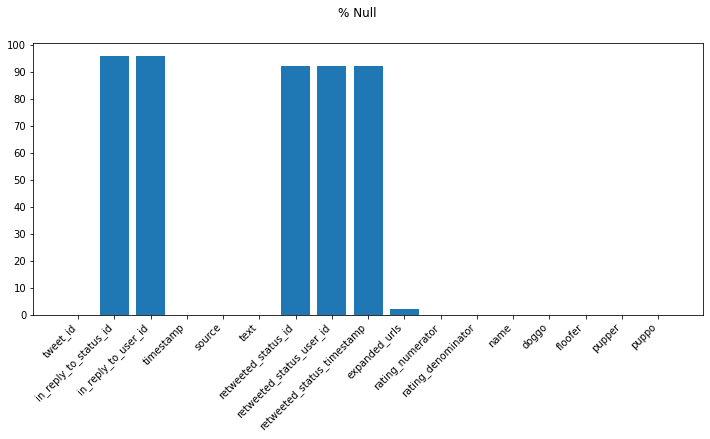

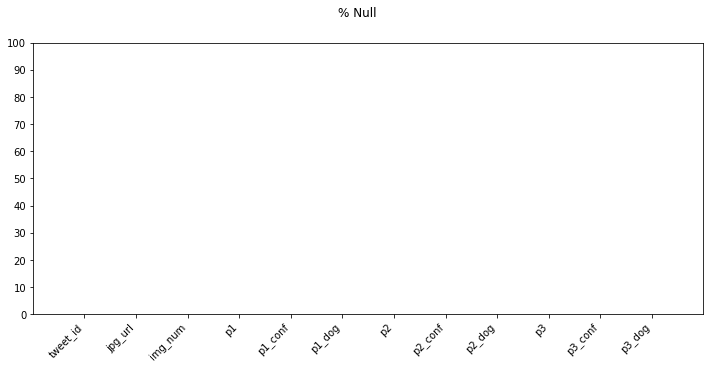

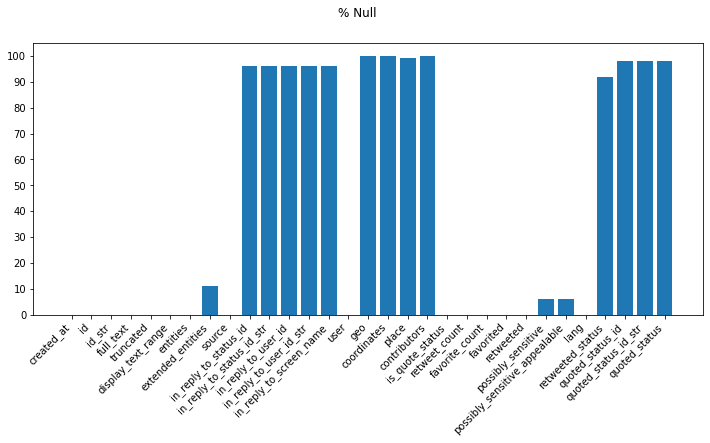

In [586]:
## nan values in data sets


def nullperc(x):
    datasets = x
    for df in datasets:
        x = df.isna().sum()
        x = pd.DataFrame(x).reset_index()
        x = x.rename(columns={'index':'column',0:'No. of Rows'})
        plist = []
        for i in range(len(x)):
            prs = int((x.iloc[i,1]/len(df))*100)
            plist.append(prs)
        x['null_percentage'] = plist
        
        
        fig = plt.figure(figsize=(12, 5))
        ax = plt.bar(x['column'],x['null_percentage'])
        ticks = plt.xticks(rotation = 45,ha='right')
        title = fig.suptitle("% Null")
        ylabel = plt.yticks(range(0,110,10))

        plt.show()

nullperc([archivedf,imgdf,tweetsdf])

Issue ( 3 ): Wrong Dog Names

In [587]:
imgdf.loc[[7,9,19],'p1']

7           box_turtle
9        shopping_cart
19    desktop_computer
Name: p1, dtype: object

Issue ( 4 ): Wrong Image Predictions

In [588]:
#tweets with 2 or more Wrong photos
imgdf[((imgdf['p1_dog'] == 'False') &(imgdf['p2_dog'] == 'False')) |
          ((imgdf['p1_dog'] == 'False') & (imgdf['p3_dog'] == 'False'))|
          ((imgdf['p2_dog'] == 'False') & (imgdf['p3_dog'] == 'False'))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
9,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True
18,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.0339194,False,partridge,5.20658e-05,False
19,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.0855474,False,bookcase,0.0794797,False
22,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.9146709999999999,False,otter,0.01525,False,great_grey_owl,0.0132072,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2045,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.0252856,False,Siamese_cat,0.00284892,False
2047,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044172699999999995,False
2053,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.0291754,False,shopping_cart,0.0263208,False
2072,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False


Issue ( 5 ): Irregular Numbers in Counts

In [589]:
tweetsdf.loc[[211,158],['retweet_count','favorite_count']]

,retweet_count,favorite_count
211,23,0
158,2334,0


Issue ( 6 ): Wrong boolean values

In [590]:
boolenvals = imgdf.copy()
boolenvals.loc[2066:2071,['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
2066,True,True,True
2067,True,True,True
2068,True,True,True
2069,True,True,False
2070,True,True,False
2071,True,True,True


In [591]:
boolenvals['p1_dog'] =boolenvals['p1_dog'].astype(bool)
boolenvals['p2_dog'] = boolenvals['p1_dog'].astype(bool)
boolenvals['p3_dog'] = boolenvals['p1_dog'].astype(bool)
boolenvals.loc[2066:2071,['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
2066,True,True,True
2067,True,True,True
2068,True,True,True
2069,True,True,True
2070,True,True,True
2071,True,True,True


Issue ( 7 ): wrong languages abbreviations

In [592]:
tweetsdf['lang'].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

Issue ( 8 ): missing values in entities column

In [593]:
tweetsdf.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

## Data Cleaning

Issue ( 1 ) : Wrong Data Types

In [594]:
imgdf_cleaned = imgdf.copy()
tweetsdf_cleaned = tweetsdf.copy()
archivedf_cleaned = archivedf.copy()

archivedf_cleaned = archivedf_cleaned.sort_values(by='tweet_id',ascending=True)
archivedf_cleaned['tweet_id'] = archivedf_cleaned['tweet_id'].astype(object)


imgdf_cleaned['p1_conf'] = imgdf_cleaned['p1_conf'].astype(float)
imgdf_cleaned['p2_conf'] = imgdf_cleaned['p2_conf'].astype(float)
imgdf_cleaned['p3_conf'] = imgdf_cleaned['p3_conf'].astype(float)

tweetsdf_cleaned = tweetsdf_cleaned.sort_values(by='id',ascending=True)
tweetsdf_cleaned['id'] = tweetsdf_cleaned['id'].astype(object)



tweetsdf_cleaned =tweetsdf_cleaned.copy()
tweetsdf_cleaned.loc[:,'created_at'] = pd.to_datetime(tweetsdf_cleaned.loc[:,'created_at'])
archivedf_cleaned =archivedf_cleaned.copy()
archivedf_cleaned.loc[:,'timestamp'] = pd.to_datetime(archivedf_cleaned.loc[:,'timestamp'])

Issue ( 3 ) : unnecessary columns  that can be joined

In [595]:
def join_columns(column1, column2, column3, column4):
    joined_column = []
    
    for val1, val2, val3, val4 in zip(column1, column2, column3, column4):
        if val1 is not None:
            joined_column.append(val1)
        elif val2 is not None:
            joined_column.append(val2)
        elif val3 is not None:
            joined_column.append(val3)
        else:
            joined_column.append(val4)
    
    return joined_column

# Example usage:
column1 = archivedf_cleaned['doggo']
column2 = archivedf_cleaned['floofer']
column3 = archivedf_cleaned['pupper']
column4 = archivedf_cleaned['puppo']

joined_column = join_columns(column1, column2, column3, column4)
archivedf_cleaned['Nickname'] = joined_column
archivedf_cleaned.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

Issue (2) : Columns have mutiple values that can't be used

In [596]:
def hashtags(col):
    hashtags = []
    for i in col:
        entities = dict(i)
        if entities['hashtags'] == []:
            hashtags.append('None')
        else:
            hashtags.append(entities['hashtags'][0]['text'])
            
    return hashtags

tweetsdf_cleaned['hashtags'] = hashtags(tweetsdf_cleaned['entities'])


Issue ( 1 ) , ( 2 ) : Null Values in multiple datasets

In [597]:
# dropping columns with more than 90% nan values
datasets = [archivedf_cleaned,imgdf_cleaned,tweetsdf_cleaned]
def dropnans(data):
    x= data.dropna(thresh=data.shape[0]*0.9,how='all',axis=1)
    return x
archivedf_cleaned = dropnans(datasets[0])
imgdf_cleaned = dropnans(datasets[1])
tweetsdf_cleaned = dropnans(datasets[2])

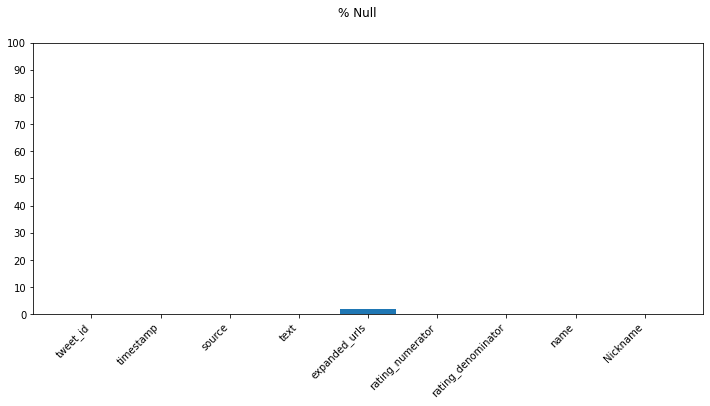

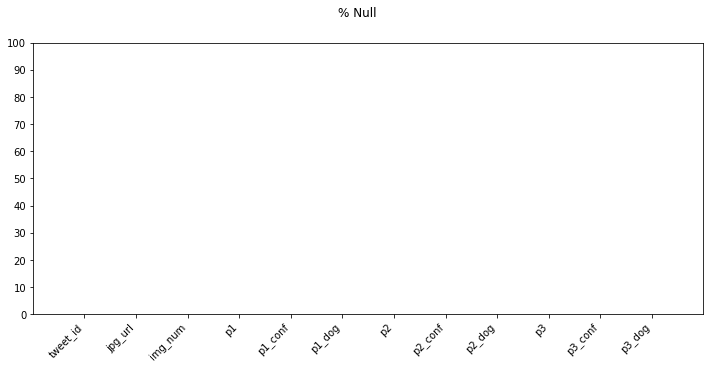

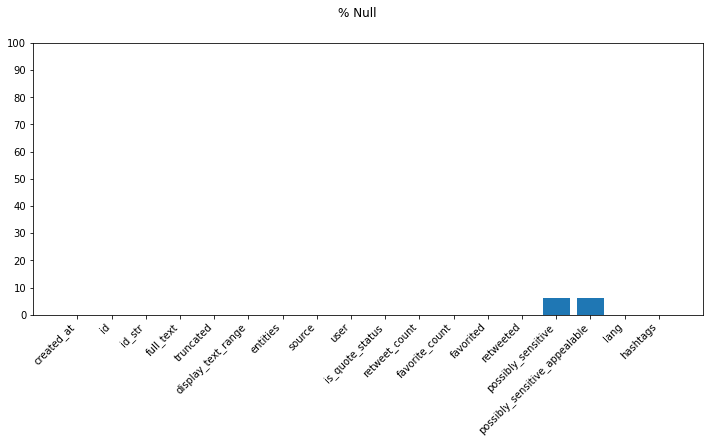

In [598]:
nullperc([archivedf_cleaned,imgdf_cleaned,tweetsdf_cleaned])

Issue ( 3 ): Wrong Dog Names

Issue ( 4 ): Wrong Image Predictions

In [599]:
#dropping tweets with 2 or more Wrong photos and Dog Names
imgdf_cleaned.drop(imgdf_cleaned[((imgdf_cleaned['p1_dog'] == 'False') &(imgdf_cleaned['p2_dog'] == 'False')) |
          ((imgdf_cleaned['p1_dog'] == 'False') & (imgdf_cleaned['p3_dog'] == 'False'))|
          ((imgdf_cleaned['p2_dog'] == 'False') & (imgdf_cleaned['p3_dog'] == 'False'))].index,axis=0,inplace=True)

Issue ( 5 ): Irregular Numbers in Counts

In [600]:
#We Will set them to nan as they will affect our calculations

tweetsdf_cleaned.loc[:,['favorite_count']][(tweetsdf_cleaned['favorite_count'] == 0) &
                                           (tweetsdf_cleaned['retweet_count'] > 100)] = np.nan


Issue ( 7 ): wrong languages abbreviations

We Won't Remove Them As They Won't Affect Our Analysis

Issue ( 8 ): missing values in entities column

In [601]:
#dropping entities column and other unnecessary columns

tweetsdf_cleaned = tweetsdf_cleaned.drop(columns=['entities','id_str','display_text_range',
                                                  'truncated','source','is_quote_status'],axis=1)

Dropping tweets before 2017


In [602]:
tweetsdf_cleaned = tweetsdf_cleaned[tweetsdf_cleaned['created_at'] < '2017-8-02']

Renaming Columns And Merging

In [608]:
tweetsdf_cleaned.rename(columns={'id':'tweet_id'},inplace=True)

newdf = archivedf_cleaned.merge(tweetsdf_cleaned,on='tweet_id')
newdf2 = pd.concat([newdf,imgdf_cleaned.iloc[:,1:]],axis=1)

Dropping Unnecessary Columns

In [609]:
newdf2.drop(columns=['expanded_urls','source','possibly_sensitive','timestamp','text','expanded_urls','full_text',
                     'possibly_sensitive_appealable','user'],axis=1,inplace=True)

Dropping rows With No Img Data

In [611]:
newdf2 = newdf2.dropna()
newdf2

,tweet_id,rating_numerator,rating_denominator,name,Nickname,created_at,retweet_count,favorite_count,favorited,retweeted,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,7,10,a,None,2015-11-15 23:05:30+00:00,48,132,False,False,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
2,666033412701032449,9,10,a,None,2015-11-15 23:21:54+00:00,47,128,False,False,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
3,666044226329800704,6,10,a,None,2015-11-16 00:04:52+00:00,147,311,False,False,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
4,666049248165822465,5,10,None,None,2015-11-16 00:24:50+00:00,41,111,False,False,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
5,666050758794694657,10,10,a,None,2015-11-16 00:30:50+00:00,60,136,False,False,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,838916489579200512,15,10,None,None,2017-03-07 00:57:32+00:00,38,0,False,False,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2070,838921590096166913,13,10,Arlo,None,2017-03-07 01:17:48+00:00,2357,12183,False,False,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2071,838952994649550848,13,10,None,None,2017-03-07 03:22:35+00:00,4505,21289,False,False,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2073,839290600511926273,10,10,None,None,2017-03-08 01:44:07+00:00,158,0,False,False,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


# **Analyzing and Visualizing Data**